# Covid-19 Checker

### Aplication of Neural Network knowledge to detect Covid-19 and Simply Pneumonia, by lungs x-ray images.
---
### Features:

- Detect condition via lungs X-Rays images
- Detect afected areas

In [2]:
#Copy images to disk - Google Colaboratotor

#from google.colab import drive
#drive.mount('/content/drive')

#!unzip "/content/drive/MyDrive/covid-19-checker/img.zip" -d "./"

In [3]:
#Internal Python Libraries
import os
import random
import gc

#External Python Libraries
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, accuracy_score
import imutils
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions
from tensorflow import keras

In [4]:
#X-rays with lungs without any condition
normal_dir_data="./img/NORMAL/"
#X-rays with lungs with only pneumonia
pneu_dir_data="./img/PNEUMONIA/"
#X-rays with lungs with covid-19
covid_dir_data="./img/COVID/"

#put folder name on images
data_normal = ['./img/NORMAL/{}'.format(i) for i in os.listdir(normal_dir_data)]
data_pneu = ['./img/PNEUMONIA/{}'.format(i) for i in os.listdir(pneu_dir_data)]
data_covid = ['./img/COVID/{}'.format(i) for i in os.listdir(covid_dir_data)]

#all images
data = data_normal  + data_pneu + data_covid
#shuffle images
random.shuffle(data)

#delete not necessary arrays
del data_normal
del data_pneu
del data_covid

#clear cache
gc.collect()

44

In [5]:
#image dimensions
height = 256
width = 256
canais = 3  #channels - 3 for RGB / 1 for Black & White


# Divide images by categories
def process_images(images):

    x = [] # images
    y = [] # categories
    
    for image in images:
        
        image_rgb = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (height,width), interpolation=cv2.INTER_CUBIC) #RGB image

        
        if canais == 1:
          image_bw = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY) #Black and White image
          x.append(image_bw) # append BW image
        elif canais == 3:
          x.append(image_rgb) # append RGB image
       
        # Image Categories - NORMAL(0)/PNEUMONIA(1)/COVID(2)
        if "NORMAL" in os.path.split(image)[0]:
            y.append(0)
        elif "PNEUMONIA" in os.path.split(image)[0]:
            y.append(1)
        elif "COVID" in os.path.split(image)[0]:
            y.append(2)
    
    return x, y

In [6]:
# Divide images by categories
x,y = process_images(data)

# Divide train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(x_train[0].shape, x_test[0].shape) #Image Dimensions

(256, 256, 3) (256, 256, 3)


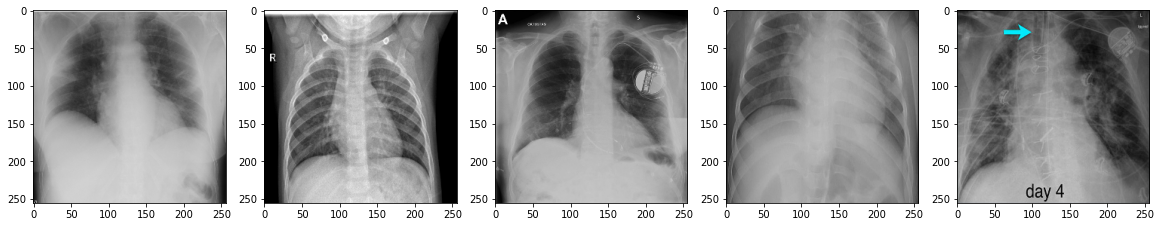

In [7]:
#Show Random Train Pictures
plt.figure(figsize=(20,10))
columns = 5

for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(x_train[i], cmap='gray', vmin=0, vmax=255)

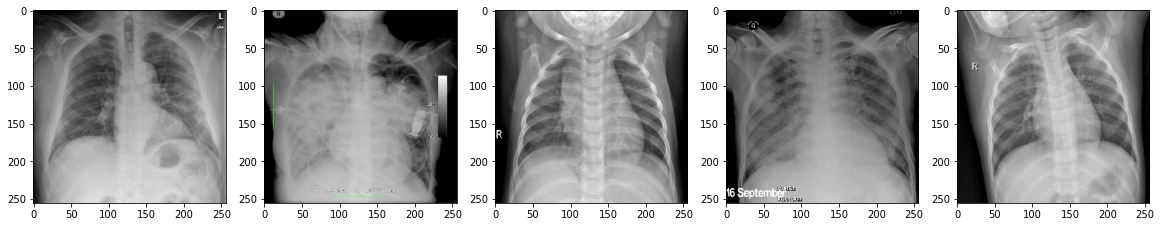

In [8]:
#Show Random Test Pictures
plt.figure(figsize=(20,10))
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(x_test[i], cmap='gray', vmin=0, vmax=255)

0 - NORMAL, 1 - PNEUMONIA, 2 - COVID


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Condition')

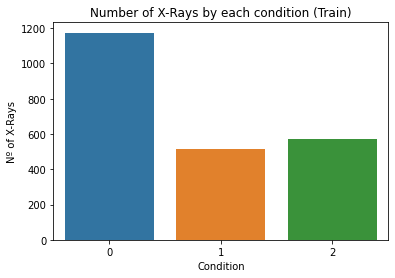

In [9]:
# Convert to numpy array
x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

# Show Number of x-ray by each condition (Train)
print("0 - NORMAL, 1 - PNEUMONIA, 2 - COVID")
sns.countplot(y_train)
plt.title('Number of X-Rays by each condition (Train)')
plt.ylabel("Nº of X-Rays")
plt.xlabel("Condition")

0 - NORMAL, 1 - PNEUMONIA, 2 - COVID


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Condition')

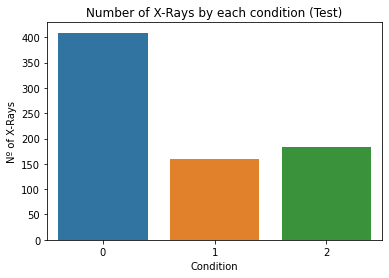

In [10]:
# Show Number of x-ray by each condition (Test)
print("0 - NORMAL, 1 - PNEUMONIA, 2 - COVID")
sns.countplot(y_test)
plt.title('Number of X-Rays by each condition (Test)')
plt.ylabel("Nº of X-Rays")
plt.xlabel("Condition")

In [11]:
print("Dimension of Train Input:", x_train.shape) # Dimension of Train Input
print("Dimension of Train Output:", y_train.shape[0]) # Dimension of Train Output

print("Dimension of Test Input:", x_test.shape) # Dimension of Test Input
print("Dimension of Train Output:", y_test.shape) # Dimension of Train Output

Dimension of Train Input: (2257, 256, 256, 3)
Dimension of Train Output: 2257
Dimension of Test Input: (753, 256, 256, 3)
Dimension of Train Output: (753,)


***Inteligência*** ***Artificial***







In [12]:
classes = 3 #Types of Output
input_shape = (256, 256, 3) # BW - 256,256,1 / RGB - 256,256,3

# Train Dummies
dummies = pd.get_dummies(y_train) 
y_train = dummies.values

# Test Dummies
dummies = pd.get_dummies(y_test)
y_test = dummies.values

In [13]:
# Images pixels beetween 0 and 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# x shape
print("Shape y_train:", y_train.shape)
print("Shape x_train:", x_train.shape)

# y shape
print(x_train.shape[0], "train data")
print(x_test.shape[0], "test data")

Shape y_train: (2257, 3)
Shape x_train: (2257, 256, 256, 3)
2257 train data
753 test data


[0 1 0]


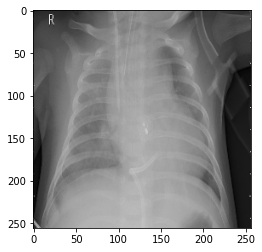

In [14]:
# image and dummie value (Train)
plt.imshow(x_train[100])
print(y_train[100])

[1 0 0]


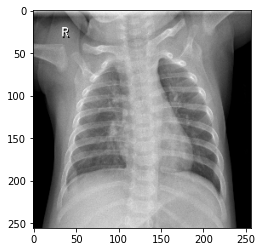

In [15]:
# image and dummie value (Test)
plt.imshow(x_test[5])
print(y_test[5])

In [16]:
# Neural Network Model
model = keras.Sequential(
        [
        keras.Input(shape=input_shape),
        layers.ZeroPadding2D(padding=(1, 1)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dense(64, activation='relu'),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu",padding='same'),
        layers.ZeroPadding2D(padding=(3, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)), 
        layers.Flatten(),
        layers.Dense(200),
        layers.Dropout(0.2),
        layers.Dense(100),
        layers.Dropout(0.2),
        layers.Dense(classes, activation="softmax"),
    ]
)

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 258, 258, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 258, 258, 128)     3584      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 264, 264, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 132, 132, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 132, 132, 128)     147584    
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 138, 138, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 69, 69, 128)       0

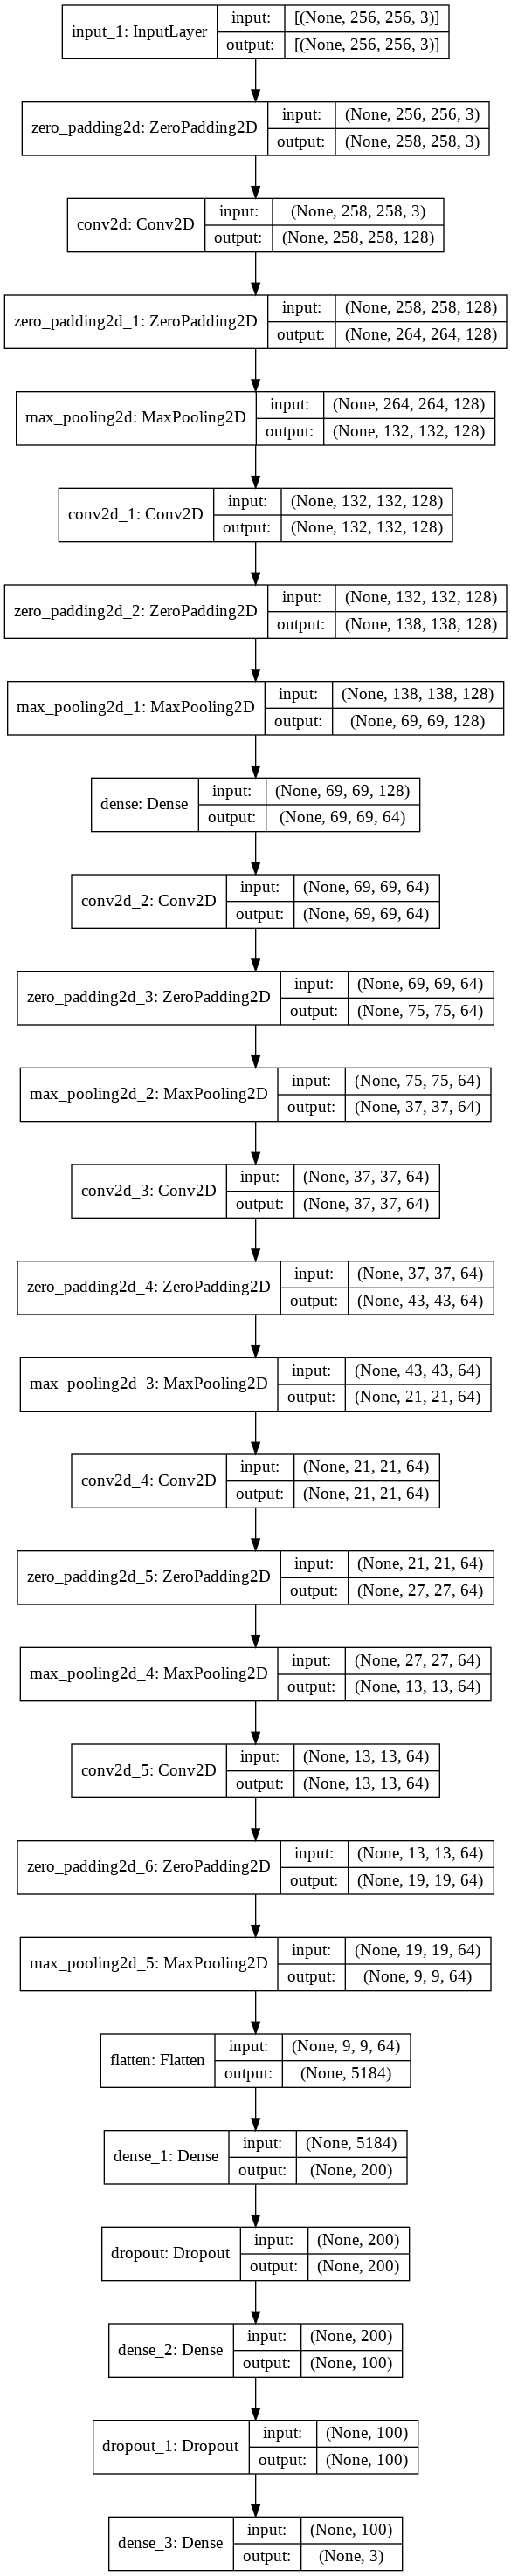

In [19]:
#Plot Model
keras.utils.plot_model(model, to_file='./model.png', show_shapes=True, show_layer_names=True)

In [20]:
# If Black and White uncomment below:
# x_train = tf.expand_dims(X_train,2)
# x_test = tf.expand_dims(X_test,2)

In [21]:
# Batch Size and Epochs
batch_size = 64
epochs = 15

# Model Compilation
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Model Execution and Train
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=epochs)

Epoch 1/15
36/36 [==============================] - 57s 596ms/step - loss: 0.6888 - accuracy: 0.7062 - val_loss: 0.3680 - val_accuracy: 0.8805
Epoch 2/15
36/36 [==============================] - 16s 458ms/step - loss: 0.3051 - accuracy: 0.8977 - val_loss: 0.3135 - val_accuracy: 0.9044
Epoch 3/15
36/36 [==============================] - 17s 466ms/step - loss: 0.2444 - accuracy: 0.9176 - val_loss: 0.1720 - val_accuracy: 0.9296
Epoch 4/15
36/36 [==============================] - 17s 472ms/step - loss: 0.1770 - accuracy: 0.9411 - val_loss: 0.1196 - val_accuracy: 0.9522
Epoch 5/15
36/36 [==============================] - 17s 467ms/step - loss: 0.1531 - accuracy: 0.9513 - val_loss: 0.1192 - val_accuracy: 0.9548
Epoch 6/15
36/36 [==============================] - 17s 461ms/step - loss: 0.1259 - accuracy: 0.9570 - val_loss: 0.1143 - val_accuracy: 0.9575
Epoch 7/15
36/36 [==============================] - 16s 458ms/step - loss: 0.1198 - accuracy: 0.9557 - val_loss: 0.0943 - val_accuracy: 0.9655

In [22]:
# To Save Model and his weights uncomment below:
# model.save_weights('./weights.h5')
# model.save('./model.h5')

In [23]:
# Loss and accuracy (Train)
score_train = model.evaluate(x_train, y_train, verbose=0)
print("Loss (Train):", score_train[0])
print("Accuracy (Train):", score_train[1])

# Loss and accuracy (Test)
score_test = model.evaluate(x_test, y_test, verbose=0)
print("Loss (Test):", score_test[0])
print("Accuracy (Test):", score_test[1])

Loss (Train): 0.04987690970301628
Accuracy (Train): 0.9796189665794373
Loss (Test): 0.11339305341243744
Accuracy (Test): 0.9588313698768616


In [24]:
# Predicted Results (Test)
pred = model.predict(x_test)
print(pred)
print(y_test)

[[2.9807453e-04 6.1157243e-06 9.9969578e-01]
 [1.1425068e-05 1.1543973e-04 9.9987316e-01]
 [9.9999547e-01 2.7770920e-06 1.7722881e-06]
 ...
 [1.0321443e-02 9.8967803e-01 4.4054192e-07]
 [4.9118556e-05 2.9114283e-06 9.9994802e-01]
 [9.9936670e-01 6.0045946e-04 3.2874432e-05]]
[[0 0 1]
 [0 0 1]
 [1 0 0]
 ...
 [0 1 0]
 [0 0 1]
 [1 0 0]]


In [25]:
# Predicted and obtained classes
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print("Predicted:", predict_classes)
print("Expected:", expected_classes)

#Accuracy (Test)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Accuracy: {correct}")

Predicted: [2 2 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 2 2 0 2 0 2 2 2 0 1 1 2 0 0 0 0 0
 0 2 2 2 1 1 1 2 0 0 0 0 0 0 1 1 0 0 0 2 0 0 0 0 2 2 0 0 2 2 1 1 1 0 2 2 2
 1 0 0 0 0 0 2 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 2 0 0 2 2 2 2 0 2 1 0 0 0 0 0
 0 0 2 1 0 2 0 1 1 2 0 1 0 2 0 0 0 2 0 0 2 2 0 0 0 0 2 2 2 1 2 0 2 1 0 0 2
 0 0 0 0 2 0 2 0 0 0 0 0 2 2 2 2 0 0 1 0 0 0 2 2 0 0 1 0 2 0 0 0 0 0 0 0 0
 2 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 2 2 0 2 2 0 2 0 1 0 1 0 0 2 1 1 0 0
 1 0 0 1 0 0 1 0 2 2 0 0 1 0 0 1 1 0 1 2 1 0 0 2 0 2 0 2 2 0 0 0 2 0 0 1 0
 0 1 2 0 0 0 2 1 0 1 2 1 1 0 0 0 0 0 0 2 0 0 0 0 0 2 0 1 0 2 0 0 2 0 2 0 1
 0 0 0 0 0 0 2 0 1 0 1 0 0 2 2 0 0 0 0 1 0 2 2 0 0 0 0 1 0 0 0 1 0 2 0 0 0
 2 2 1 0 0 0 1 1 0 0 0 0 0 0 2 1 2 1 0 0 0 0 0 1 2 0 2 2 0 0 2 1 1 0 0 0 0
 0 2 1 0 0 2 1 1 2 1 0 0 0 1 1 0 2 0 0 2 0 2 0 0 0 2 2 2 2 0 0 1 0 0 2 0 0
 0 2 0 1 2 2 0 0 0 2 0 0 2 2 0 2 0 1 2 1 2 0 0 2 1 0 2 0 0 0 1 0 0 2 0 0 0
 0 0 2 1 2 0 1 1 0 0 1 2 1 1 2 2 0 0 1 2 0 0 1 0 0 0 1 0 2 2 0 0 0 2 0 0 1
 0 0 2 0 1 0 1

Predicted: Normal.


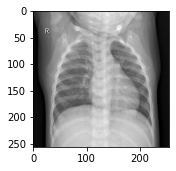

In [29]:
# Single Image
image = "./img/NORMAL/IM-0122-0001.jpeg"
image_rgb = cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (height,width), interpolation=cv2.INTER_CUBIC)
#image_bw = cv2.cvtColor(imagem_cor, cv2.COLOR_BGR2GRAY)
#tf.expand_dims(
imagem = tf.expand_dims(np.array(image_rgb).astype("float32") / 255, 0)   
    #,3)
pred = model.predict(imagem)
pred = np.argmax(pred)
conditions = ["Normal", "Pneumonia", "Covid"]
plt.figure(figsize=(5,2.5))
plt.imshow(image_rgb)
print("Predicted: " + conditions[pred] + ".")

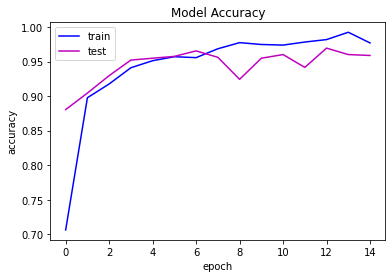

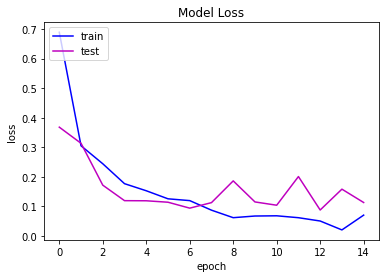

In [30]:
# Accuracy (Train/Test)
acc=np.array(hist.history['accuracy'])
plt.plot(acc,'b')
plt.plot(hist.history['val_accuracy'],'m')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss (Train/Test)
loss=np.array(hist.history['loss'])
plt.plot(loss,'b',label='train')
plt.plot(hist.history['val_loss'],'m',label='test')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Confusion Matrix (Train)
Train Data accuracy: 97.96%
              precision    recall  f1-score   support

           0     0.9749    0.9940    0.9844      1174
           1     0.9958    0.9238    0.9585       512
           2     0.9761    1.0000    0.9879       571

    accuracy                         0.9796      2257
   macro avg     0.9823    0.9726    0.9769      2257
weighted avg     0.9800    0.9796    0.9794      2257



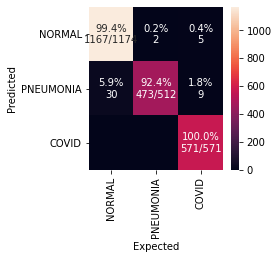

Confusion Matrix (Test)
Test Data accuracy: 95.88%
              precision    recall  f1-score   support

           0     0.9549    0.9829    0.9687       409
           1     0.9655    0.8750    0.9180       160
           2     0.9626    0.9783    0.9704       184

    accuracy                         0.9588       753
   macro avg     0.9610    0.9454    0.9524       753
weighted avg     0.9590    0.9588    0.9583       753



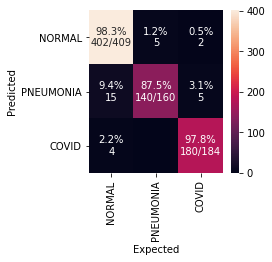

In [31]:
# Confusion Matrix (Train)
print('Confusion Matrix (Train)')
cm=confusion_matrix(np.argmax(y_train,axis=1), np.argmax(model.predict(x_train),axis=1))
scores = model.evaluate(x_train,y_train, verbose=0)
print("Train Data %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

pred = model.predict(x_train)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_train, axis=1), predicted,digits=4)
print(report)


def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(3,3)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Predicted'
    cm.columns.name = 'Expected'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()
    
    
    
cm_analysis(np.argmax(y_train, axis=1), predicted,
            labels=["NORMAL","PNEUMONIA", "COVID"], ymap=None, figsize=(3,3))


# Confusion Matrix (Test)
print('Confusion Matrix (Test)')
cm=confusion_matrix(np.argmax(y_test,axis=1), np.argmax(model.predict(x_test),axis=1))
scores = model.evaluate(x_test,y_test, verbose=0)
print("Test Data %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

pred = model.predict(x_test)
predicted = np.argmax(pred, axis=1)
report = classification_report(np.argmax(y_test, axis=1), predicted,digits=4)
print(report)


def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(3,3)):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Predicted'
    cm.columns.name = 'Expected'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.show()
    
    
    
cm_analysis(np.argmax(y_test, axis=1), predicted,
            labels=["NORMAL","PNEUMONIA", "COVID"], ymap=None, figsize=(3,3))

In [32]:
class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        if self.layerName is None:
            self.layerName = self.find_target_layer()
    def find_target_layer(self):
        for layer in reversed(self.model.layers):
            if len(layer.output_shape) == 4:
                return layer.name
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")
    def compute_heatmap(self, image, eps=1e-8):
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output,
                self.model.output])
        with tf.GradientTape() as tape:
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            loss = predictions[:, self.classIdx]
        # Gradient
        grads = tape.gradient(loss, convOutputs)
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)
        # Heatmap Size
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # Normalized HeatMap
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # Return Heatmap
        return heatmap

In [33]:
# Create Folders if needed
try:
  os.mkdir("./img/results/")
except:
  print('Folder ./img/results/ already created')

try:
  os.mkdir("./img/results/PNEUMONIA/")
except:
  print('Folder ./img/results/PNEUMONIA already created')

try:
  os.mkdir("./img/results/COVID/")
except:
  print('Folder ./img/results/COVID already created')

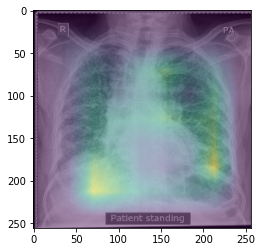

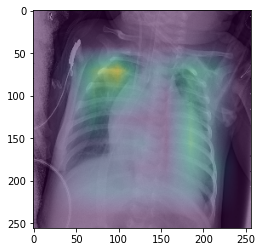

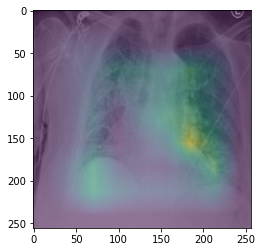

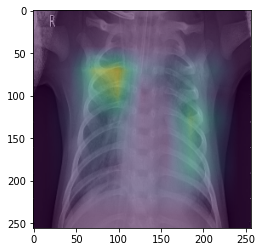

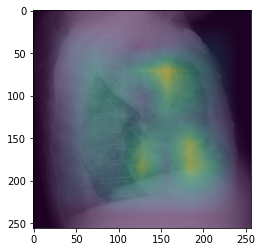

In [34]:
# random sample size - 10
data = random.sample(data, 10)


for i in data:
  filename = i
  original = cv2.imread(filename)
  resized = cv2.resize(original, (height, width))
  dataXG = np.array(resized) / 255.0
  dataXG = np.expand_dims(dataXG, axis=0)

  preds = model.predict(dataXG)
  pred = np.argmax(preds[0])
  
  if pred != 0:
    # Heatmap
    cam = GradCAM(model=model, classIdx=pred, layerName='max_pooling2d_5')
    heatmap = cam.compute_heatmap(dataXG)

    # Heatmap over Image
    plt.imshow(heatmap)
    plt.imshow(resized, alpha=0.6)
    if pred == 1:
      plt.savefig("./img/results/PNEUMONIA/" + os.path.basename(i))
      plt.show("./img/results/PNEUMONIA/" + os.path.basename(i)) 
    elif pred == 2:
      plt.savefig("./img/results/COVID/" + os.path.basename(i))
      plt.show("./img/results/COVID/" + os.path.basename(i)) 